In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## helper functions
def length(a):
    return np.sqrt(np.dot(a.T,a))

def normalize(a):
    return a/length(a)

def get_cov(X,X_mean):
    return (np.dot((X-X_mean).T,(X-X_mean))/X.shape[0])

def get_mean(X):
    return X.sum(axis=0) / X.shape[0]

def total_variance(X,X_mean):
    return np.sum((X-X_mean)**2) / X.shape[0]
    

In [3]:
np.random.seed(42)

In [4]:
df = pd.read_csv('./OnlineNewsPopularity.csv')

In [5]:
df = df.drop(df.columns[list(range(0,2))+list(range(4,7))+list(range(13,39))+list([60])],axis = 1)

In [6]:
A = df.to_numpy()
A = A - get_mean(A)

## Part I: Principal Components

In [7]:
## find out what is d
d = A.shape[1]

In [8]:
epsilon = 10e-6
intermediate_result = list()
X_i = np.random.rand(d,2)
X_i[:,0] = normalize(X_i[:,0])
X_i[:,1] = normalize(X_i[:,1])
cov = get_cov(A,get_mean(A))
while len(intermediate_result)<2 or np.linalg.norm(intermediate_result[-1] - intermediate_result[-2])>=epsilon:
    X_iplus1 = np.dot(cov,X_i)
    X_iplus1[:,1] = X_iplus1[:,1] - np.dot((np.dot(X_iplus1[:,1].T,X_iplus1[:,0])/np.dot(X_iplus1[:,0].T,X_iplus1[:,0])),X_iplus1[:,0])
    X_iplus1[:,0] = normalize(X_iplus1[:,0])
    X_iplus1[:,1] = normalize(X_iplus1[:,1])
    X_i = X_iplus1
    intermediate_result.append(X_iplus1)

## print the eigenvectors

In [9]:
u_1 = X_iplus1[:,0]
u_1

array([ 8.14100194e-05,  9.99926215e-01,  1.01811464e-02,  2.49388297e-03,
        6.04491654e-03,  9.04271447e-04,  3.00785998e-04,  2.95308578e-04,
        1.46195969e-05, -4.53741188e-06,  5.22428019e-05, -8.77574570e-05,
        2.53161365e-05,  3.16816880e-05,  4.51765886e-06,  4.95594477e-06,
        2.87291719e-06,  3.99556713e-05,  3.34944687e-05,  2.99912637e-05,
       -3.95789431e-05,  2.18646340e-04, -3.53519865e-05, -2.77644379e-04,
        4.57198703e-05,  3.09714383e-06,  1.31668126e-05,  2.85934541e-06,
        6.46413486e-06])

In [10]:
u_2 = X_iplus1[:,1]
u_2

array([-1.34374538e-02, -1.18687466e-02,  9.32584345e-01,  1.23326144e-01,
        3.37162266e-01,  2.02110767e-02,  1.17240203e-02,  2.10723522e-02,
       -1.84965431e-03, -7.32427179e-04, -2.31818969e-03,  6.96473822e-03,
       -2.06544977e-03,  1.77574444e-03,  7.68324644e-04, -3.02962896e-05,
       -2.51717253e-05,  8.91039585e-04,  2.47099283e-04,  1.43983891e-03,
        3.08137878e-04,  2.72151615e-03, -1.25921471e-03, -1.83848564e-03,
       -4.55306197e-04,  1.70199974e-03,  9.97328837e-04,  4.51956392e-05,
        1.39464765e-03])

In [11]:
first_PC = np.dot(A, u_1)
second_PC = np.dot(A, u_2)

In [12]:
pc = np.concatenate((first_PC.reshape(-1,1),second_PC.reshape(-1,1)),axis = 1)

In [13]:
pc = pd.DataFrame(pc,columns=['pc1','pc2'])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

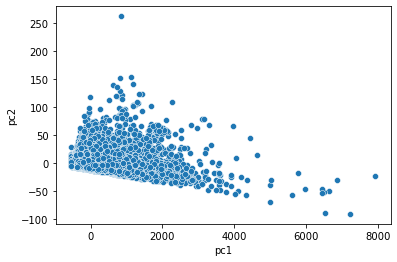

In [14]:
sns.scatterplot(data = pc, x= 'pc1',y = 'pc2')

## To calculate the captured variance, we use the variance of the projectede matrix diveded by the variance of the original matrix

In [15]:
total_variance(np.array(pc),get_mean(np.array(pc)))/total_variance(A,get_mean(A))

0.9995844392378403

To find the error given only two PCs, we use the formula mse = var(D) - $\lambda_1$ - $\lambda_2$.
Given the eigenvector, we can find the eigenvalue using the following equation
$$\lambda = \cfrac{v^T A^T v}{v^T v} = \cfrac{(A v)^T v}{v^T v}$$

In [16]:
labda_1 = np.dot(np.dot(u_1.T,cov.T),u_1)/(np.dot(u_1.T,u_1))
labda_2 = np.dot(np.dot(u_2.T,cov.T),u_2)/(np.dot(u_2.T,u_2))

In [17]:
error = total_variance(A,get_mean(A)) - labda_1 -labda_2
error

92.32746408395414

Part II: Points in High Dimensional Space

In [18]:
## generate the dateset (epsilon was added since the 1 is an open interval in this formula)
ds = []
for d in range(2,21):
    ds.append(1+epsilon-(-1) * np.random.random_sample(size=(1000000,d)) + (- 1))

In [19]:
## if a point has norm<=1, then it is in the inscribed hypersphere
ds_counter = [0]*len(ds)
for i in range(len(ds)):
    for j in ds[i]:
        if length(j) <= 1:
            ds_counter[i] += 1
    ds_counter[i] = ds_counter[i]/ds[i].shape[0]

In [ ]:
ds_counter_1 = np.concatenate((np.array(range(2,21)).reshape(-1,1),np.array(ds_counter).reshape(-1,1)),axis = 1)
ds_counter_1 = pd.DataFrame(ds_counter_1,columns=['d','fraction'])

<AxesSubplot:xlabel='d', ylabel='fraction'>

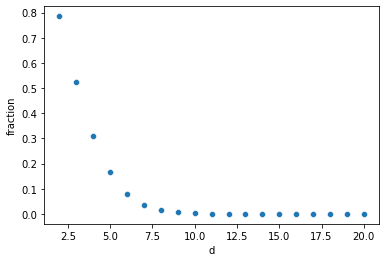

In [ ]:
sns.scatterplot(data = ds_counter_1, x= 'd',y = 'fraction')

In [ ]:
## if a point has any of its point smaller than -1 + epsilon or greater than 1-epsilon, then it is outside of H_epsilon
epsilon_1 = 0.1
ds_counter_2 = [0]*len(ds)
for i in range(len(ds)):
    for j in ds[i]:
        flag = False
        for k in j:
            if k<-1+epsilon_1 or k>1-epsilon_1: 
                flag = True
                break
        if flag:
            ds_counter_2[i] += 1
    ds_counter_2[i] = ds_counter_2[i]/ds[i].shape[0]

## The trend is exponential decay. As d increases, the fraction decays exponentially.

In [ ]:
ds_counter_2 = np.concatenate((np.array(range(2,21)).reshape(-1,1),np.array(ds_counter_2).reshape(-1,1)),axis = 1)
ds_counter_2 = pd.DataFrame(ds_counter_2,columns=['d','fraction'])

<AxesSubplot:xlabel='d', ylabel='fraction'>

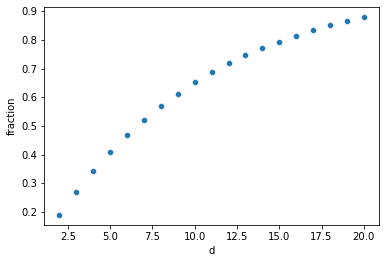

In [ ]:
sns.scatterplot(data = ds_counter_2, x= 'd',y = 'fraction')

## The trend is exponential growth. As d increases, the fraction grows exponentially.